## Импорт необходимых библиотек

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from datetime import date
import numpy as np
import seaborn as sns
from collections import Counter


## Загрузка json-файла из проекта и преобразование его в DataFrame

In [2]:
users_df = pd.read_json('/Users/okti/Desktop/users.json')
display(users_df)

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,О себе,Специализация,Приглашена,Пригласила на сайт
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,NaN,NaN,NaN
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,NaN,NaN,NaN
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,NaN,NaN,NaN
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,Захабренный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,Отхабренный,"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,NaN,NaN,NaN
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,NaN,NaN,NaN
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,Захабренный,"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,NaN,NaN,NaN


## Посмотрим на количество непустых строк в столбцах

In [7]:
non_null_df = pd.DataFrame(users_df.count(), columns=['Non-Null Count'])

sorted_non_null_df = non_null_df.sort_values(by='Non-Null Count', ascending=False)

display(sorted_non_null_df)

,Non-Null Count
tag,8030
karma,7839
rating,7627
В рейтинге,7627
Зарегистрирован,7627
Значки,6147
Состоит в хабах,5964
Откуда,3938
Подписан на компании,3311
Дата рождения,2591


## Удалим столбцы с избыточной информацией (О себе, Приглашена, Пригласила на сайт)

In [4]:
users_df = users_df.drop(columns = ['О себе', 'Приглашена', 'Пригласила на сайт'])
users_df.head()

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN


## Добавим столбец с возрастом пользователя

In [5]:
today = date.today()
users_df['Возраст'] = (today.year - pd.to_datetime(users_df['Дата рождения']).dt.year)
users_df['Возраст'] = users_df['Возраст'].fillna(-1).astype(int)


def categorize_age(age):
    if age >= 0 and age <= 18:
        return 'молодой'
    elif age > 18 and age <= 60:
        return 'взрослый'
    elif age > 60:
        return 'пожилой'
    else:
        return 'неизвестно' 

users_df['Возраст'] = users_df['Возраст'].map(categorize_age)

display(users_df)

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация,Возраст
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN,неизвестно
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,взрослый
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,неизвестно
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,взрослый
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,Захабренный,NaN,NaN,NaN,NaN,NaN,NaN,неизвестно
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,Отхабренный,"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,неизвестно
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,неизвестно
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,Захабренный,"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,взрослый


 ## Посмотрим распределение участников сообщества по возрасту

Возраст
неизвестно    5440
взрослый      2517
пожилой         64
молодой         10
Name: count, dtype: int64

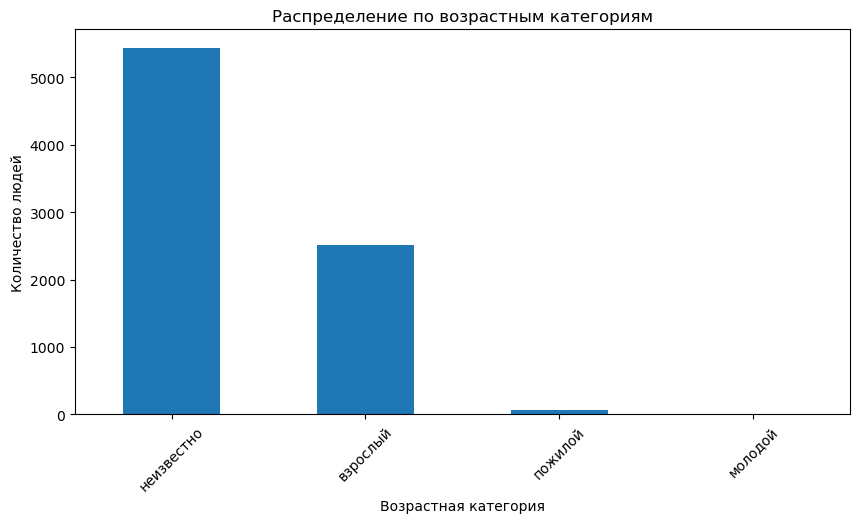

In [6]:
plt.figure(figsize=(10, 5))

age_categories_counts = users_df['Возраст'].value_counts()

display(age_categories_counts)

age_categories_counts.plot(kind='bar')

plt.title('Распределение по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество людей')

plt.xticks(rotation=45)  
plt.show()



## Пострим простой граф для просмотра кармы пользователей (СДЕЛАТЬ)

In [7]:
plt.figure(figsize=(10, 6))  
plt.hist(df['karma'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Распределение кармы пользователей')  
plt.xlabel('karma')  
plt.ylabel('Количество пользователей')  
plt.show()  

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

## Построим граф для просмотра количества регистраций (СДЕЛАТЬ)

## Построим граф для просмотра связности сообществ

In [8]:

users_df['Состоит в хабах'] = users_df['Состоит в хабах'].apply(lambda x: x if isinstance(x, list) else [])


In [9]:
G = nx.Graph()

for hubs in users_df['Состоит в хабах']:
    for hub1 in hubs:
        for hub2 in hubs:
            if hub1 != hub2:
                if G.has_edge(hub1, hub2):
                    G[hub1][hub2]['weight'] += 1
                else:
                    G.add_edge(hub1, hub2, weight=1)

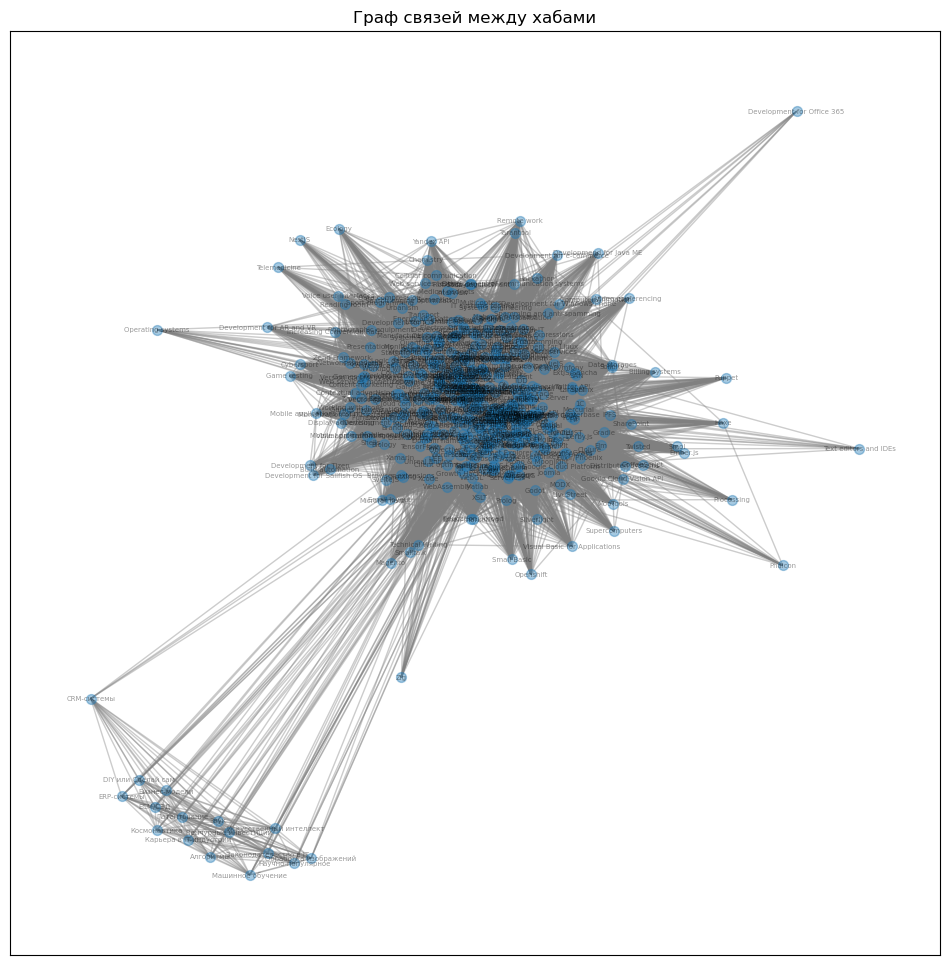

In [10]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_size=50, edge_color='gray', alpha=0.4, with_labels=True, font_size=5)
plt.title('Граф связей между хабами')
plt.show()

In [11]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Топ-5 хабов по центральности:")
for hub, value in sorted_centrality:
    print(f"{hub}: {value}")
    
print("Граф связный:", nx.is_connected(G))

connected_components = nx.connected_components(G)
print("Количество компонент связности:", len(list(connected_components)))

components_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print("Размеры компонент связности:", components_sizes)



Топ-5 хабов по центральности:
GTD: 0.9390519187358916
DIY: 0.9367945823927765
Habr: 0.927765237020316
Python: 0.9164785553047403
Big Data: 0.9119638826185101
Граф связный: True
Количество компонент связности: 1
Размеры компонент связности: [444]


## Построим граф для анализа значков пользователя

In [12]:
users_df['Значки'] = users_df['Значки'].str.split(' ')
desired_badges = ['Захабренный', 'Отхабренный', 'Комментатор', 'Переводчик', 'Старожил', 'Автор', 'Звезда', 'Легенда']
users_df['Фильтрованные значки'] = users_df['Значки'].apply(lambda badges_list: [badge for badge in badges_list if badge in desired_badges] if isinstance(badges_list, list) else [])

all_filtered_badges = [badge for sublist in users_df['Фильтрованные значки'] for badge in sublist]

badge_counts = Counter(all_filtered_badges)

badges_count_df = pd.DataFrame(badge_counts.items(), columns=['Значок', 'Количество']).sort_values(by='Количество', ascending=False)

print(badges_count_df)


        Значок  Количество
0  Захабренный        4803
1  Отхабренный        1278
4     Старожил         737
3  Комментатор          83
2        Автор          75
5      Легенда          49
6   Переводчик          45
7       Звезда          22


In [13]:
display(users_df)
display(badges_amount)

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация,Возраст,Фильтрованные значки
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,"[Бета-тестер, ▇▅▄▅▅▄, ▇▄▅, Знаток, Хабра]",NaN,NaN,[],NaN,NaN,NaN,неизвестно,[]
1,@eresik,27.0,0.0,Не участвует,2010-05-11,[Захабренный],"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,взрослый,[Захабренный]
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,[Захабренный],NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,неизвестно,[Захабренный]
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,[Захабренный],"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,взрослый,[Захабренный]
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,"[Захабренный, Бета-тестер, ▇▅▄▅▅▄, ▇▄▅, Знаток...","Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,взрослый,[Захабренный]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,[Захабренный],NaN,NaN,[],NaN,NaN,NaN,неизвестно,[Захабренный]
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,[Отхабренный],"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,неизвестно,[Отхабренный]
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,неизвестно,[]
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,[Захабренный],"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,взрослый,[Захабренный]


NameError: name 'badges_amount' is not defined

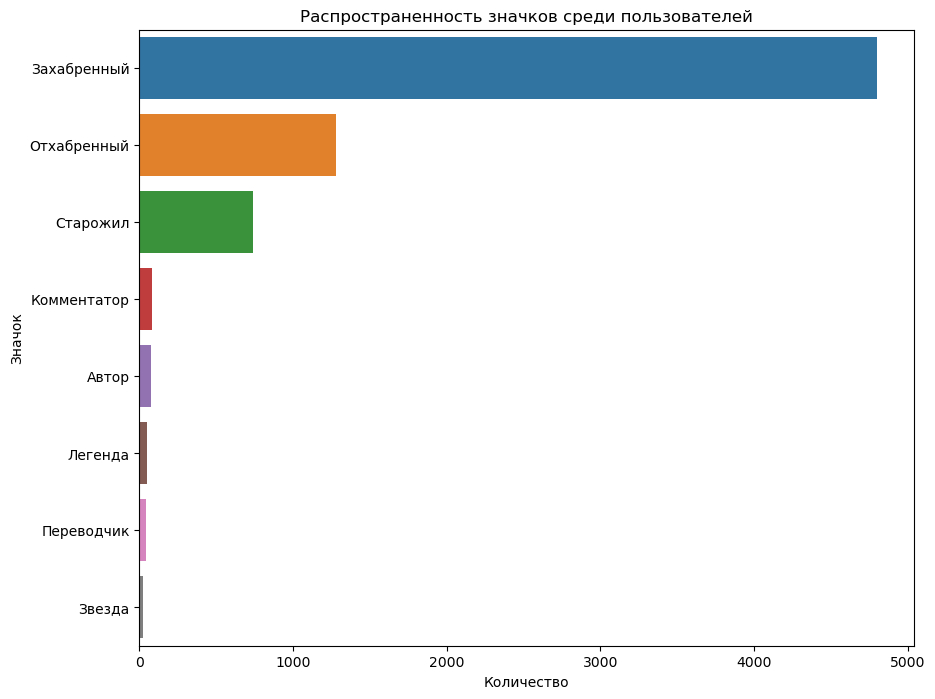

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(data=badges_count_df, x= 'Количество', y='Значок')
plt.title('Распространенность значков среди пользователей')
plt.xlabel('Количество')
plt.ylabel('Значок')
plt.show()

## Наиболее популярные комбинации значков

Фильтрованные значки
[Захабренный]                                                4029
[]                                                           1949
[Отхабренный]                                                1273
[Захабренный, Старожил]                                       576
[Захабренный, Автор, Старожил]                                 49
[Захабренный, Комментатор]                                     25
[Захабренный, Комментатор, Старожил]                           24
[Захабренный, Легенда, Старожил]                               17
[Захабренный, Легенда, Старожил, Переводчик]                   14
[Захабренный, Звезда, Старожил]                                14
[Захабренный, Автор, Старожил, Переводчик]                     10
[Захабренный, Легенда, Комментатор, Старожил]                   9
[Захабренный, Легенда, Комментатор, Старожил, Переводчик]       7
[Захабренный, Автор, Комментатор, Старожил]                     6
[Захабренный, Старожил, Переводчик]                    

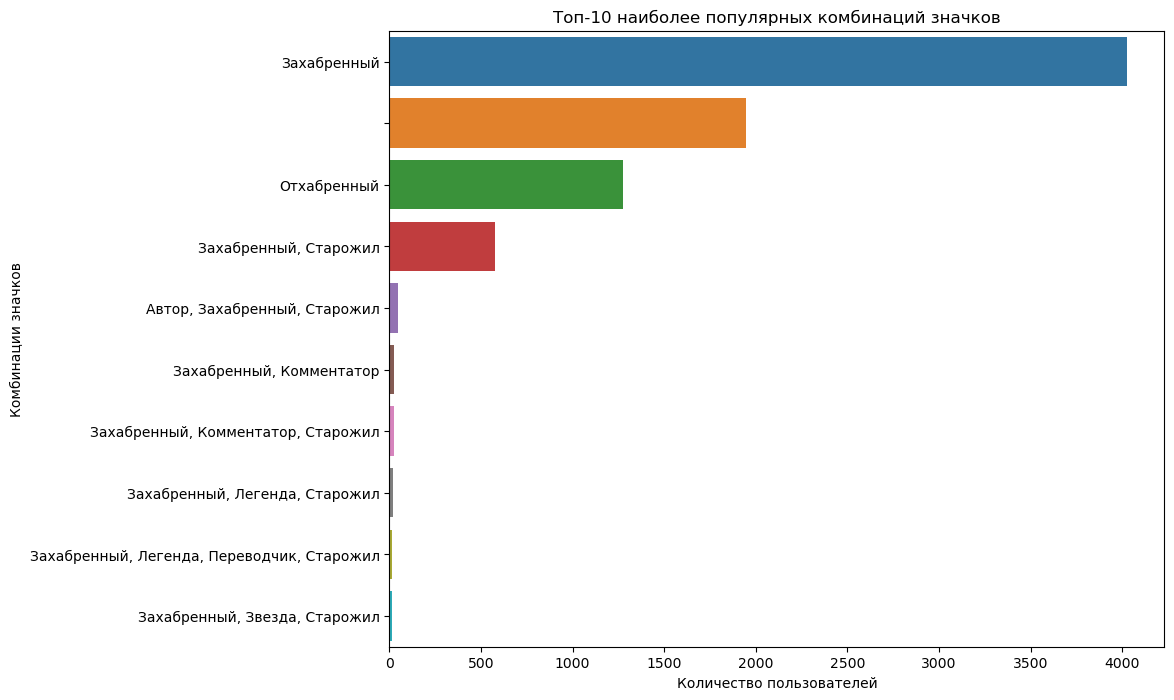

In [15]:
display(users_df['Фильтрованные значки'].value_counts())
users_df['Комбинация значков'] = users_df['Фильтрованные значки'].apply(lambda x: ', '.join(sorted(x)))

combinations_counts = users_df['Комбинация значков'].value_counts()

top_n = 10

top_combinations = combinations_counts.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_combinations.values, y=top_combinations.index)
plt.title('Топ-{} наиболее популярных комбинаций значков'.format(top_n))
plt.xlabel('Количество пользователей')
plt.ylabel('Комбинации значков')
plt.show()
